In [17]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


# 📚 Proyecto de Análisis y Modelado de Criptomonedas

In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer

In [49]:
df1 = pd.read_csv('./crypto_currencies/coin_Bitcoin.csv')
df2 = pd.read_csv('./crypto_currencies/coin_Litecoin.csv')
df3 = pd.read_csv('./crypto_currencies/coin_Monero.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        8584 non-null   int64  
 1   Name       8584 non-null   object 
 2   Symbol     8584 non-null   object 
 3   Date       8584 non-null   object 
 4   High       8584 non-null   float64
 5   Low        8584 non-null   float64
 6   Open       8584 non-null   float64
 7   Close      8584 non-null   float64
 8   Volume     8584 non-null   float64
 9   Marketcap  8584 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 670.8+ KB


,SNo,High,Low,Open,Close,Volume,Marketcap
count,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8.584000e+03,8.584000e+03
mean,1437.042754,2443.242526,2297.695559,2374.203672,2378.117650,4.297519e+09,4.351512e+10
std,835.835690,7603.848963,7109.136298,7375.720130,7383.372253,1.224228e+10,1.367798e+11
min,1.000000,0.251757,0.212967,0.220121,0.223522,0.000000e+00,1.279606e+06
25%,716.000000,9.812452,8.873865,9.349090,9.392102,3.418658e+06,2.134455e+08
50%,1431.000000,91.571416,85.498041,88.624752,88.675180,7.130490e+07,2.851460e+09
75%,2146.250000,469.253494,448.991257,458.386986,458.922989,2.058342e+09,9.183906e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


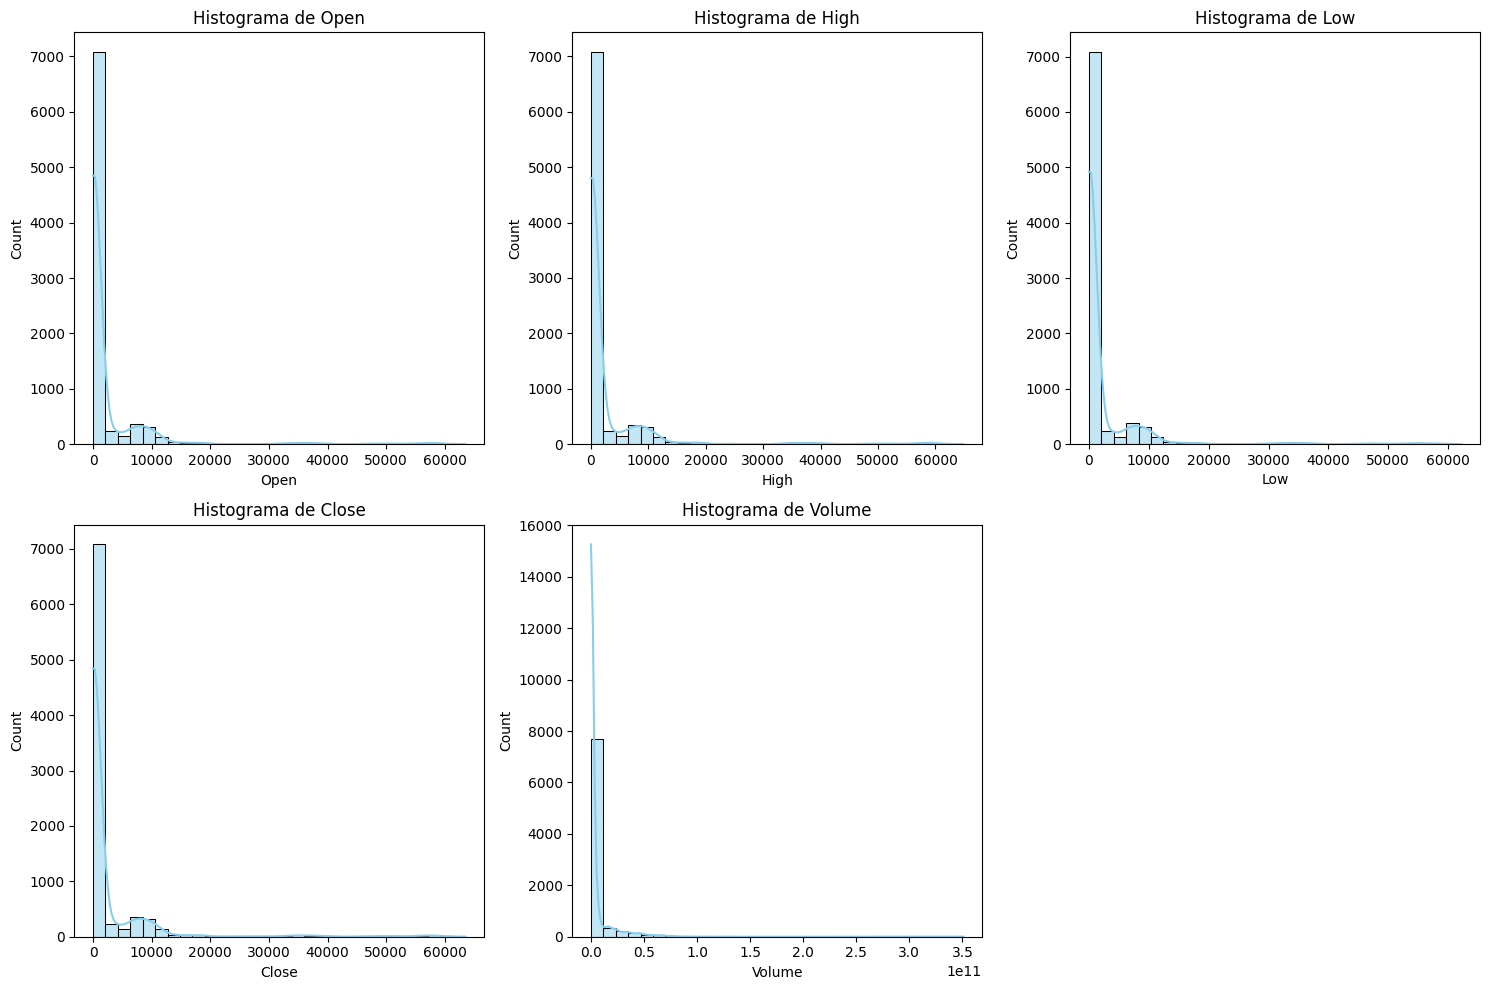

In [50]:
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()


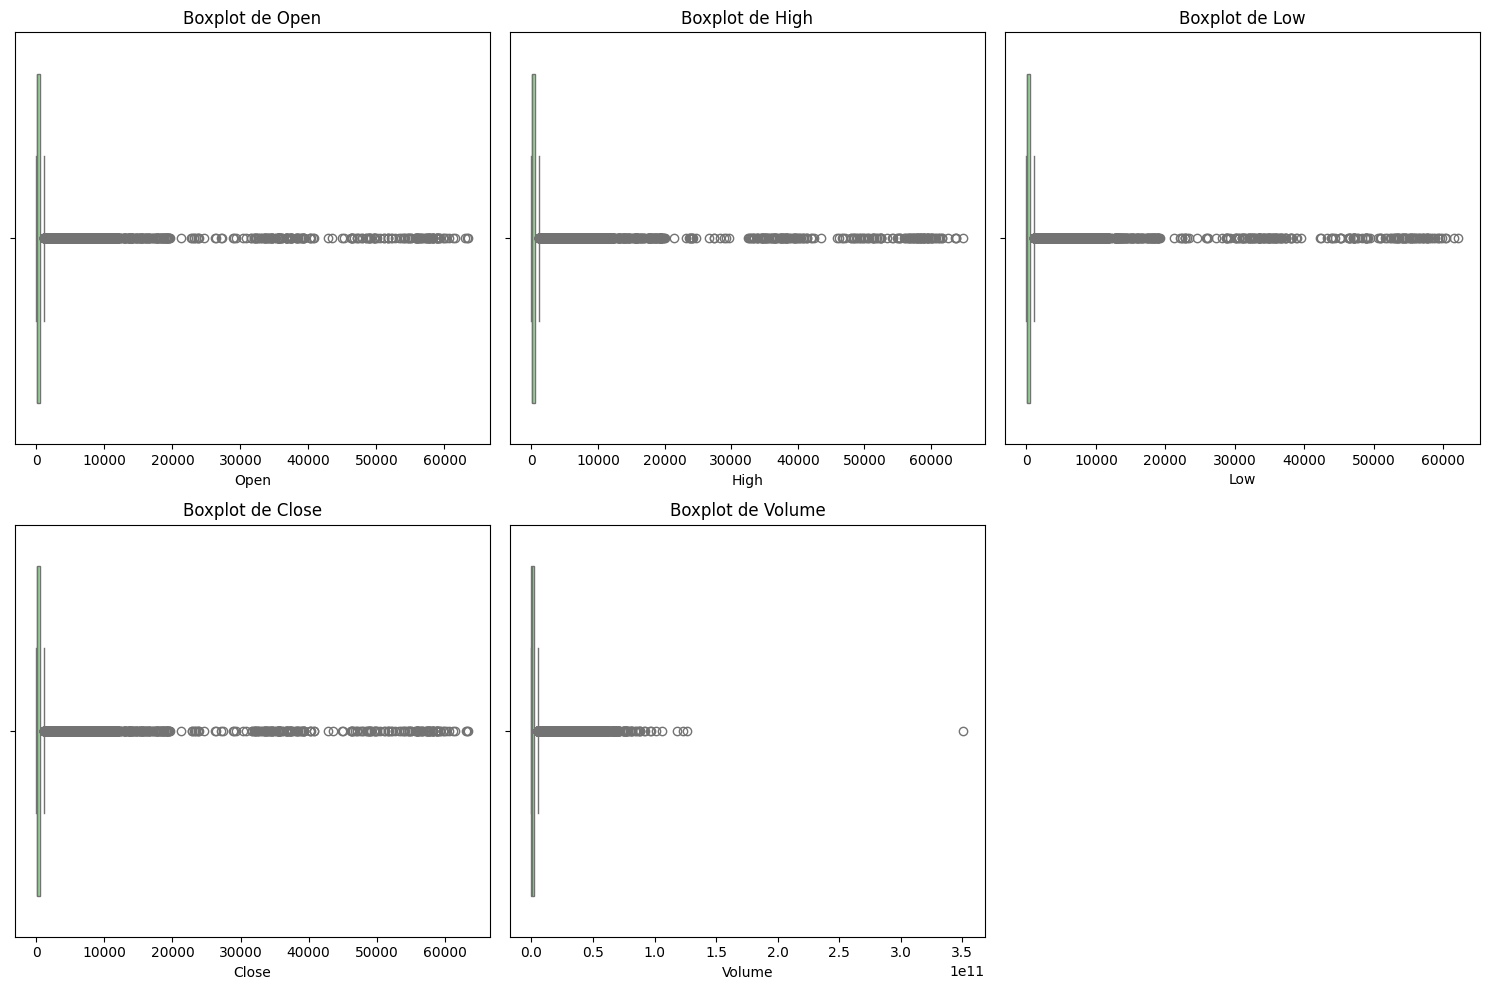

In [51]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


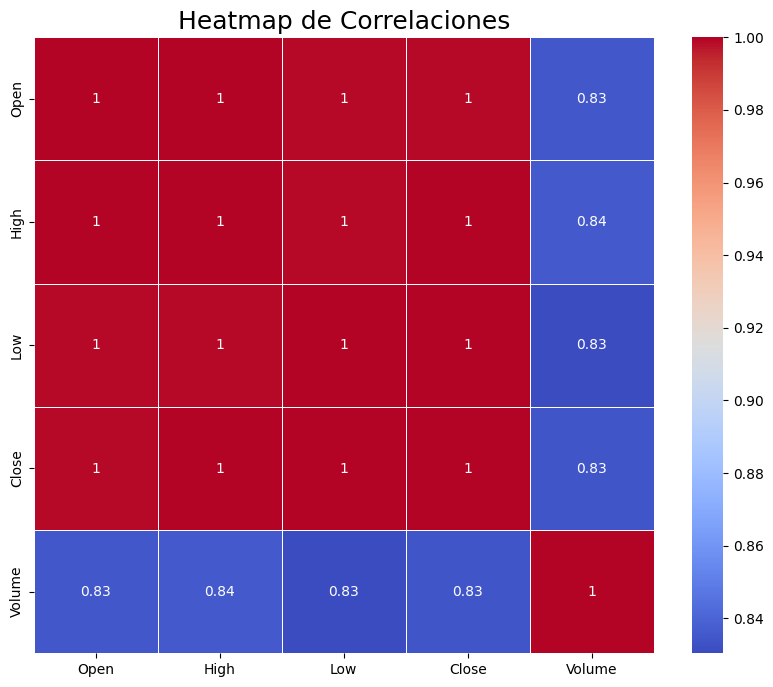

In [52]:
plt.figure(figsize=(10,8))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlaciones', fontsize=18)
plt.show()


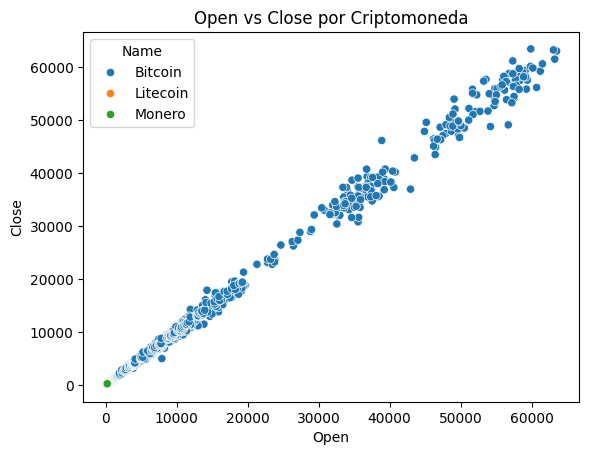

In [53]:
sns.scatterplot(data=df, x='Open', y='Close', hue='Name')
plt.title('Open vs Close por Criptomoneda')
plt.show()


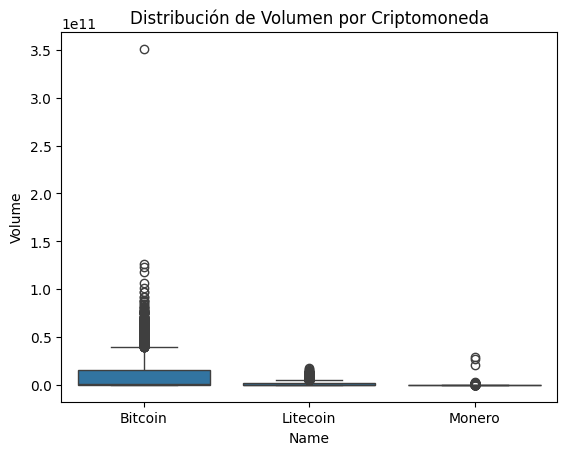

In [54]:
sns.boxplot(data=df, x='Name', y='Volume')
plt.title('Distribución de Volumen por Criptomoneda')
plt.show()


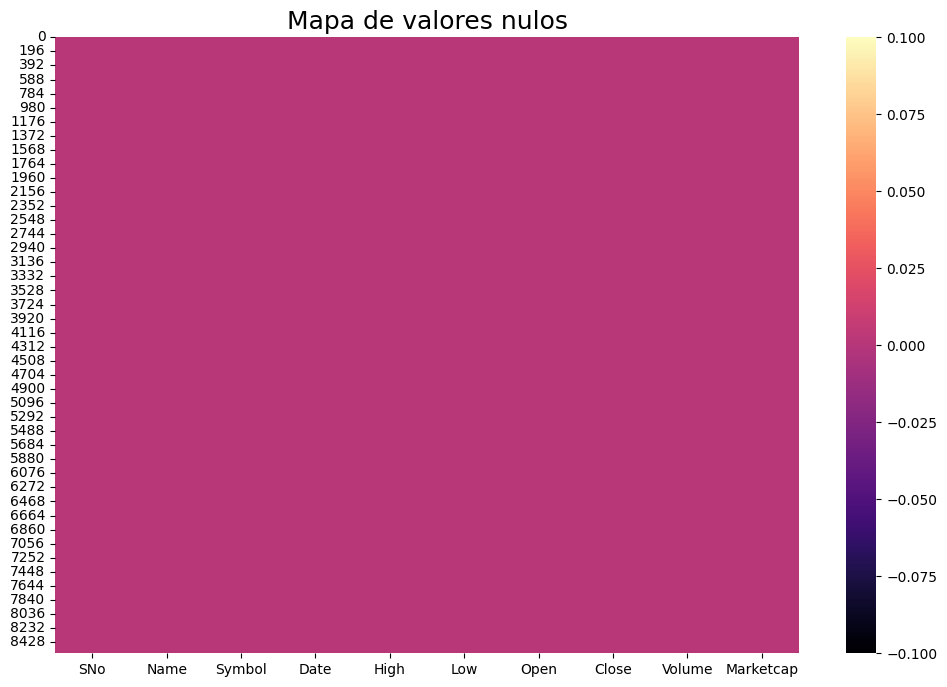

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='magma', cbar=True)
plt.title('Mapa de valores nulos', fontsize=18)
plt.show()

# No se detectaron valores nulos en el dataset, por lo que no fue necesario aplicar técnicas de imputación o eliminación de datos faltantes.

In [56]:
from sklearn.model_selection import train_test_split


# Eliminamos columnas irrelevantes
df_model = df.drop(['SNo', 'Symbol', 'Date'], axis=1)

# Detectar y eliminar outliers
z_scores = np.abs(stats.zscore(df_model.select_dtypes(include=[np.number])))
threshold = 3
df_model = df_model[(z_scores < threshold).all(axis=1)]

# Convertir Name a dummies
df_model = pd.get_dummies(df_model, columns=['Name'])

# Estandarizar columnas numéricas
scaler = StandardScaler()
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']  # ahora también Marketcap
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

# División de X e y
X = df_model.drop('Close', axis=1)
y = df_model['Close']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Regresión Lineal:
 - MSE: 0.0002
 - R²: 0.9998

Gradient Boosting:
 - MSE: 0.0003
 - R²: 0.9997

Random Forest:
 - MSE: 0.0003
 - R²: 0.9997

              Modelo       MSE        R2
0   Regresión Lineal  0.000220  0.999773
1  Gradient Boosting  0.000336  0.999653
2      Random Forest  0.000287  0.999703


/var/folders/rb/rv95_wfx7vb3zj_r838j4xy40000gn/T/ipykernel_45482/1510874066.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='MSE', data=results_df, palette='Blues_d')
/var/folders/rb/rv95_wfx7vb3zj_r838j4xy40000gn/T/ipykernel_45482/1510874066.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R2', data=results_df, palette='Greens_d')


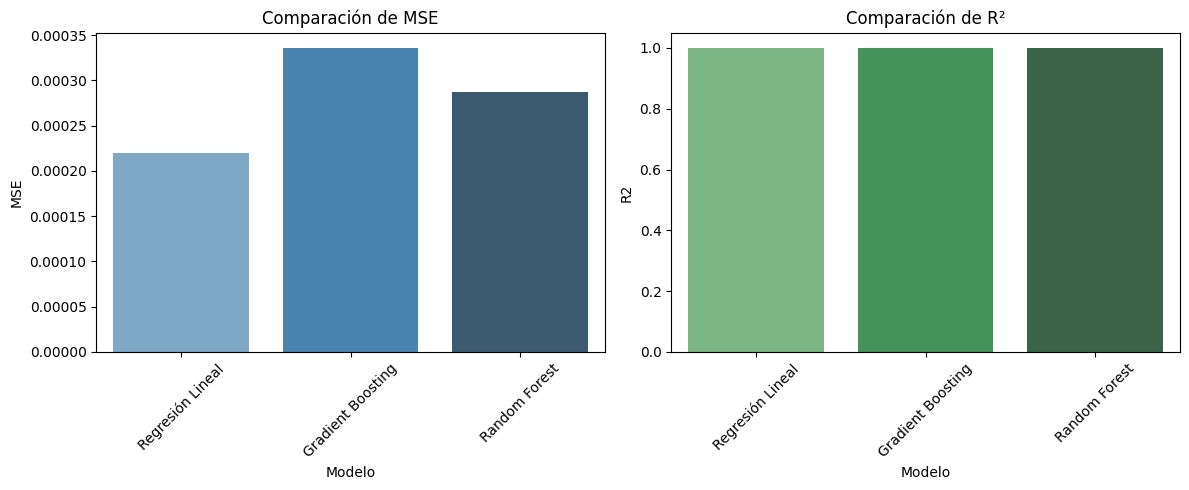

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario para guardar métricas
results = {
    'Modelo': [],
    'MSE': [],
    'R2': []
}

# Entrenar y evaluar
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results['Modelo'].append(name)
    results['MSE'].append(mse)
    results['R2'].append(r2)
    
    print(f'{name}:')
    print(f' - MSE: {mse:.4f}')
    print(f' - R²: {r2:.4f}\n')

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)
print(results_df)

# Gráficos comparativos
plt.figure(figsize=(12,5))

# Gráfico de MSE
plt.subplot(1,2,1)
sns.barplot(x='Modelo', y='MSE', data=results_df, palette='Blues_d')
plt.title('Comparación de MSE')
plt.xticks(rotation=45)

# Gráfico de R2
plt.subplot(1,2,2)
sns.barplot(x='Modelo', y='R2', data=results_df, palette='Greens_d')
plt.title('Comparación de R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Regresión Lineal:
 - MSE: 0.0002
 - R²: 0.9998

Gradient Boosting:
 - MSE: 0.0003
 - R²: 0.9997

              Modelo       MSE        R2
0   Regresión Lineal  0.000220  0.999773
1  Gradient Boosting  0.000336  0.999653


/var/folders/rb/rv95_wfx7vb3zj_r838j4xy40000gn/T/ipykernel_45482/1272045120.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='MSE', data=results_df, palette='Blues_d')
/var/folders/rb/rv95_wfx7vb3zj_r838j4xy40000gn/T/ipykernel_45482/1272045120.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R2', data=results_df, palette='Greens_d')


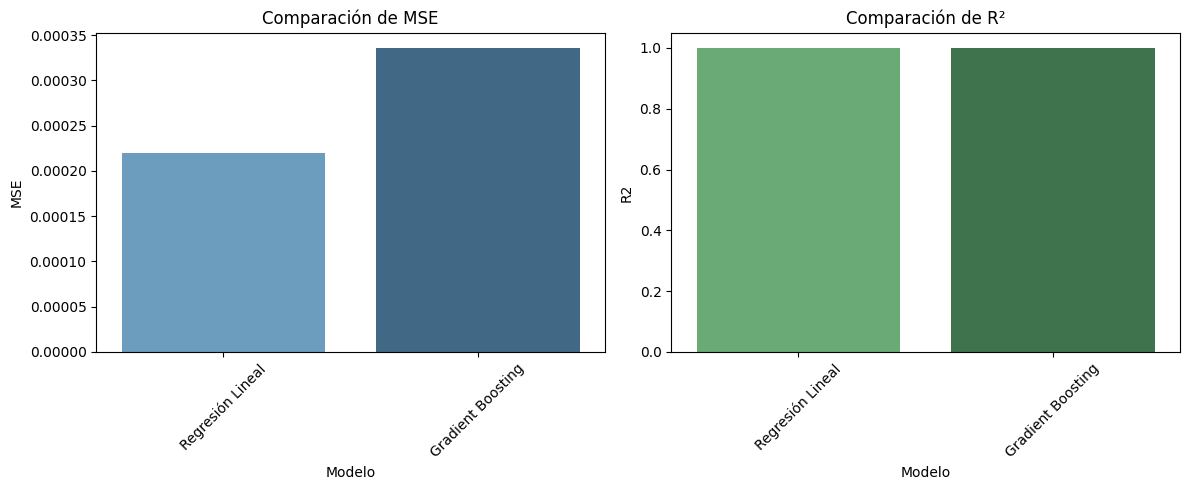

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminamos columnas irrelevantes
df_model = df.drop(['SNo', 'Symbol', 'Date'], axis=1)

# Detectar y eliminar outliers
z_scores = np.abs(stats.zscore(df_model.select_dtypes(include=[np.number])))
threshold = 3
df_model = df_model[(z_scores < threshold).all(axis=1)]

# Convertir Name a dummies
df_model = pd.get_dummies(df_model, columns=['Name'])

# Estandarizar columnas numéricas
scaler = StandardScaler()
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']  # ahora también Marketcap
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

# División de X e y
X = df_model.drop('Close', axis=1)
y = df_model['Close']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a utilizar
models = {
    'Regresión Lineal': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Diccionario para guardar métricas
results = {
    'Modelo': [],
    'MSE': [],
    'R2': []
}

# Entrenar y evaluar
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results['Modelo'].append(name)
    results['MSE'].append(mse)
    results['R2'].append(r2)
    
    print(f'{name}:')
    print(f' - MSE: {mse:.4f}')
    print(f' - R²: {r2:.4f}\n')

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)
print(results_df)

# Gráficos comparativos
plt.figure(figsize=(12,5))

# Gráfico de MSE
plt.subplot(1,2,1)
sns.barplot(x='Modelo', y='MSE', data=results_df, palette='Blues_d')
plt.title('Comparación de MSE')
plt.xticks(rotation=45)

# Gráfico de R2
plt.subplot(1,2,2)
sns.barplot(x='Modelo', y='R2', data=results_df, palette='Greens_d')
plt.title('Comparación de R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
